# Behavioral Patterns

The behavioral patterns are guidelines suggested to create classes that allows to communicate objects to each other. The goal of the behavioral patterns is to make those interactions easier and more understandable.

The five creational patterns available are:
1. Chain of Responsability
2. Command
3. Iterator
4. Mediator
5. Memento
6. Observer
7. State
8. Strategy
9. Template method
10. Visitor

Again, we are going to be convering eaach of the possible patterns and making some examples in the context of machine learning engineering.

# Mediator

**What is a mediator?**

This is a class that orchestrates the execution of several classes. 

**When should we use it?**

This is suitable when we have different components that are connected to each other. It allows to coordinate the communication between them.

**Analogy**

The mediator does the same function as a policeman in the streets. It can control the traffic, who goes first and so on.

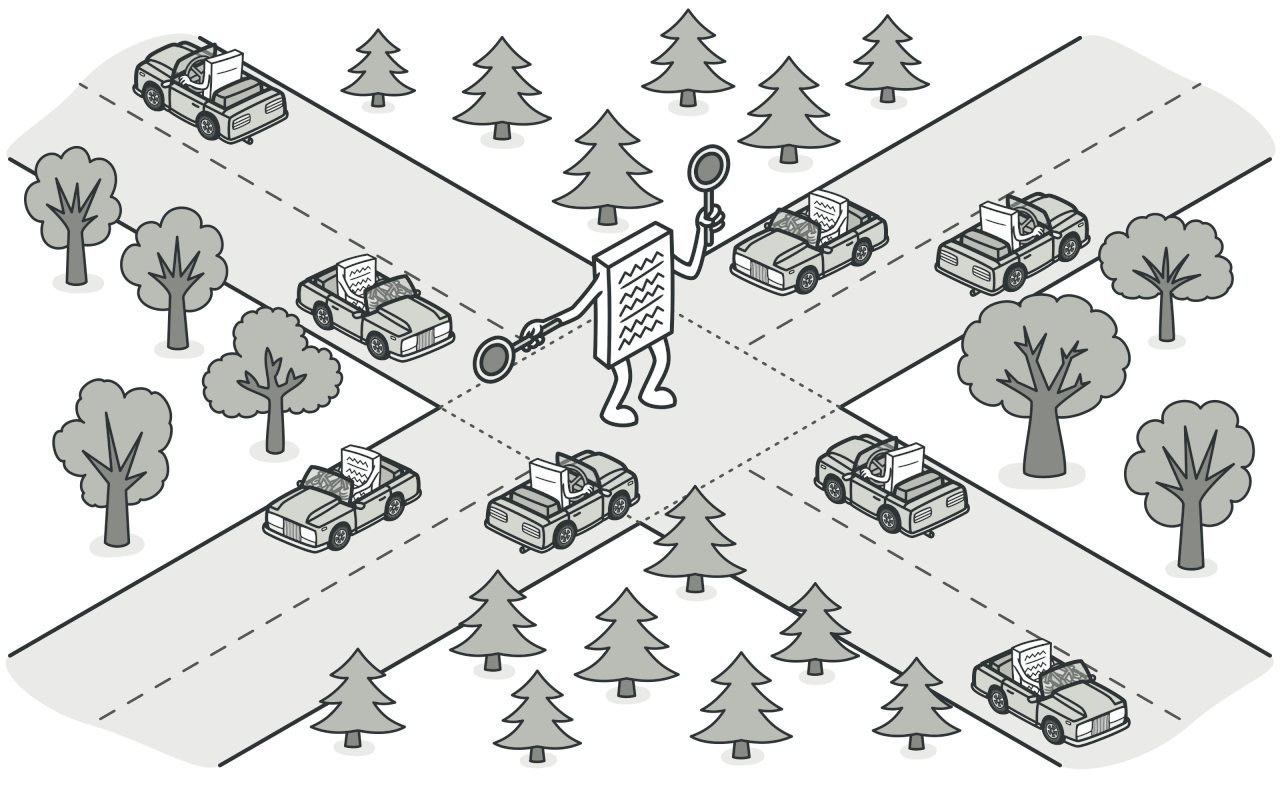

Reference: https://refactoring.guru/design-patterns/mediator

**Scenario**

You're a lead machine learning engineer. You have to create a pipeline which contains the following steps:

1. Data Encoding
2. Data Normalization
3. Model training
4. Model evaluation

Please create this pipeline in the most pythonic way to make this maintainable.

## Antipattern

The antipattern selected for this is the most straigthforward to reproduce. It can include a single pipeline class that manages everything. 

For sake of simplicity, we are not going to process real data. We are going to only simulate like if we're doing this. You'll already know how to do this.

In [85]:
import pandas as pd

In [86]:
class Pipeline:
    def __init__(self):
        self.encoders = {}

    def _data_encoding(self, df: pd.DataFrame, target_col: str) -> pd.DataFrame:
        """
        Encode categorical features using one-hot encoding.
        """
        print(f"Encoding categorical features of the column {target_col}")

    def _data_normalization(self, df: pd.DataFrame, target_cols: list) -> pd.DataFrame:
        """
        Normalize numerical features using min-max scaling.
        """
        print(f"Normalizing numerical features of the columns {target_cols}")

    def _model_training(self, df: pd.DataFrame, target_col: str) -> None:
        """
        Train a simple linear regression model.
        """
        print(f"Training model to predict {target_col}")

    def _model_evaluation(self, model, X_test: pd.DataFrame, y_test: pd.Series) -> dict:
        """
        Evaluate the model using Mean Squared Error.
        """
        print("Evaluating model performance")

    def run(self) -> None:
        """
        Run the entire pipeline.
        """
        print("Running the data processing and model training pipeline")
        self._data_encoding(None, "target")
        self._data_normalization(None, ["feature1", "feature2"])
        self._model_training(None, "target")
        self._model_evaluation(None, None, None)

Let's execute the pipeline

In [87]:
pipeline1 = Pipeline()

In [88]:
pipeline1.run()

Running the data processing and model training pipeline
Encoding categorical features of the column target
Normalizing numerical features of the columns ['feature1', 'feature2']
Training model to predict target
Evaluating model performance


What problems do we have?

1. We are breaking the single responsability principle. Our class is a god object that knows everything to do. 
2. Our class is tightly coupled. It is a risk to change sometime and break everything.
3. It breaks the open-closed principle. We can't add code wihtout modifying the existing one.

**How to solve the antipattern?**

1. Creating a mediator class
2. Deocoupling each class giving to them a unique responsability.

## Pattern

Create the mediator class

In [89]:
class PipelineMediator:
    def __init__(self):
        self.events = {}

    def register_event(self, event_name: str, handler):
        """
        This method allows to save the events
        """
        if event_name not in self.events:
            self.events[event_name] = handler
        else:
            print(f"Event {event_name} is already registered.")

    def notify(self, event_name: str, *args, **kwargs):
        """
        This method allows to notify the events - Execute the function associated with the event
        """
        if event_name in self.events:
            self.events[event_name](*args, **kwargs)
        else:
            print(f"No handler registered for event {event_name}.")

Create each processing class

In [90]:
class DataEncoder:
    def __init__(self, mediator):
        self.mediator = mediator

    def transform(self, df: pd.DataFrame, target_col: str) -> pd.DataFrame:
        print(f"Encoding categorical features of the column {target_col}")
        self.mediator.notify("data_normalization", None, None)

Create the data normalization class

In [91]:
class DataNormalization:
    def __init__(self, mediator):
        self.mediator = mediator

    def transform(self, df: pd.DataFrame, target_cols: list) -> pd.DataFrame:
        print(f"Normalizing numerical features of the columns {target_cols}")
        self.mediator.notify("model_training", None, None)

Create the model training class

In [92]:
class ModelTraining:
    def __init__(self, mediator):
        self.mediator = mediator

    def fit(self, df: pd.DataFrame, target_col: str) -> None:
        print(f"Training model to predict {target_col}")
        self.mediator.notify("model_evaluation", None, None, None)

Create the model evaluator class

In [93]:
class ModelEvaluator:
    def evaluate(self, model, X_test: pd.DataFrame, y_test: pd.Series) -> dict:
        print("Evaluating model performance")

Once we have defined everything we need, we need to define the client.

In [94]:
pipeline2 = PipelineMediator()

In [95]:
data_encoder = DataEncoder(pipeline2)
data_normalization = DataNormalization(pipeline2)
model_training = ModelTraining(pipeline2)
model_evaluator = ModelEvaluator()

In [96]:
pipeline2.register_event("data_encoding", data_encoder.transform)
pipeline2.register_event("data_normalization", data_normalization.transform)
pipeline2.register_event("model_training", model_training.fit)
pipeline2.register_event("model_evaluation", model_evaluator.evaluate)

Let's execute the pipeline

In [97]:
data_encoder.transform(None, "target")

Encoding categorical features of the column target
Normalizing numerical features of the columns None
Training model to predict None
Evaluating model performance


As you see before, we can define how the different events are going to be invoked one by another. The `mediator` serves like a general object who saves all those dependencies and executes the events.

Finally, the mediator class looks quite similar to the chain of responsability. However, my final suggestion is to use the chain of responsability when you have systems that communicate linearly. Otherwise, if you need a communication that can be in different manners, you should go with the mediator. In the previous example because it was really small, chain of responsability and mediator looks quite similar.